In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

In [2]:
file = 'all_seasons.csv'
data = pd.read_csv(file, index_col= 0)
data.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [62]:
print(data.shape)

(11145, 23)


In [63]:
for i in data.columns:
    print(i)

player_name
team_abbreviation
age
player_height
player_weight
college
country
draft_year
draft_round
draft_number
gp
pts
reb
ast
net_rating
oreb_pct
dreb_pct
usg_pct
ts_pct
ast_pct
season
drafted
position


# Number of players

In [3]:
number_of_players = data.player_name.value_counts()
print(number_of_players)

Vince Carter           22
Dirk Nowitzki          21
Kobe Bryant            20
Kevin Garnett          20
Tim Duncan             19
                       ..
God Shammgod            1
Xavier Rathan-Mayes     1
Vlatko Cancar           1
Andreas Glyniadakis     1
Andy Panko              1
Name: player_name, Length: 2235, dtype: int64


Player population since '96-'97 season: 2235 players
- NOTE: This includes those who may have not played in an official game but included in the team roster.
Players who are undrafted do not have a draft year int value. Change so that undrafted is indicated by 0.

In [4]:
# revise draft data
data['drafted'] = np.where(data['draft_year'] != 'Undrafted', 1, 0 )
data['draft_year'] = data['draft_year'].replace(r'Undrafted', np.nan, regex = True)

#Convert year data to datetime
data['draft_year'] = pd.to_datetime(data['draft_year'])
data['season'] = pd.to_datetime(data['season'].str[:4])

data['draft_year'] = data['draft_year'].dt.year
data['season'] = data['season'].dt.year

# add positions
data['position'] = 'NA'
data['position'][data['player_height'] >= 206] = 'Center'
data['position'][data['player_height'] <= 195] = 'Guard'
data['position'][(data.player_height > 195)&(data.player_height < 206 )] = 'Forward'
data.head()

<ipython-input-4-a63842dd56c9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'][data['player_height'] >= 206] = 'Center'
<ipython-input-4-a63842dd56c9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'][data['player_height'] <= 195] = 'Guard'
<ipython-input-4-a63842dd56c9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'][(data.player_height > 195)&(data.player_height < 206 )] = 'Forwa

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,position
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986.0,2,27,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996,1,Forward
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990.0,1,24,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996,1,Center
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979.0,3,58,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996,1,Forward
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995.0,1,9,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996,1,Forward
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985.0,1,10,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996,1,Forward


# Player Height and Weight Analysis

In [6]:
avg_weight = round(np.mean(data['player_weight']), 2)
avg_height = round(np.mean(data['player_height']), 2)
print(f'Average height of NBA players: {avg_height} cm')
print(f'Average weight of NBA players: {avg_weight} Kg')

Average height of NBA players: 200.81 cm
Average weight of NBA players: 100.64 Kg


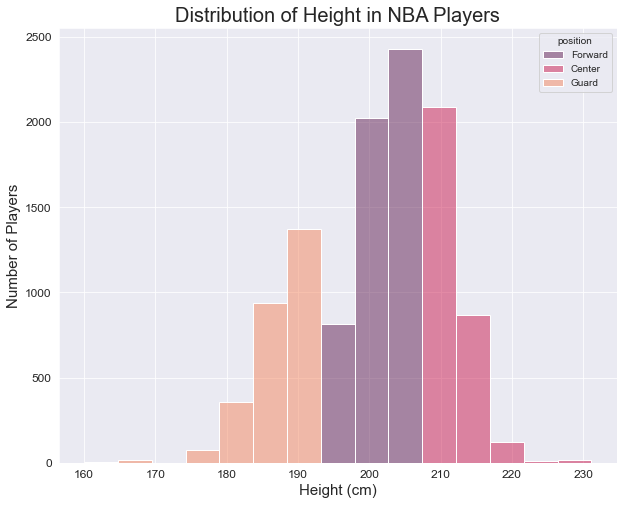

In [7]:
# Distribution
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.histplot(data = data, x = 'player_height', palette = 'rocket', hue = 'position', bins = 15)
plt.xlabel('Height (cm)', fontsize = 15)
plt.ylabel('Number of Players', fontsize = 15)
plt.title('Distribution of Height in NBA Players', fontsize =20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Is there a correlation between the height of a player and their country of origin?

In [8]:
query = """
        SELECT player_name, AVG(player_height) AS 'player_height', AVG(player_weight) AS 'player_weight', country, draft_year
        FROM data
        WHERE country == 'USA'
        GROUP BY player_name
        """
USA_players = ps.sqldf(query, locals())

query = """
        SELECT player_name, AVG(player_height) AS 'player_height', AVG(player_weight) AS 'player_weight', country, draft_year
        FROM data
        WHERE country != 'USA'
        GROUP BY player_name
        """
int_players = ps.sqldf(query, locals())

In [9]:
USA_players.head()

,player_name,player_height,player_weight,country,draft_year
0,A.C. Green,205.74,102.058200,USA,1985.0
1,A.J. Bramlett,208.28,102.965384,USA,1999.0
2,A.J. Guyton,185.42,81.646560,USA,2000.0
3,AJ Hammons,213.36,117.933920,USA,2016.0
4,AJ Price,187.96,84.821704,USA,2009.0


In [10]:
int_players.head()

,player_name,player_height,player_weight,country,draft_year
0,Abdel Nader,197.273333,102.814187,Egypt,2016.0
1,Adam Mokoka,195.580000,86.182480,France,NaN
2,Admiral Schofield,195.580000,109.315672,United Kingdom,2019.0
3,Adonal Foyle,208.280000,118.878903,St. Vincent & Grenadines,1997.0
4,Al Horford,208.084615,111.653415,Dominican Republic,2007.0


In [11]:
int_players = int_players.dropna(how='any', axis=0)
print(int_players.isnull().sum())

# mean heights and weight comparison
usa_height = np.mean(USA_players['player_height'])
usa_weight = np.mean(USA_players['player_weight'])
int_height = np.mean(int_players['player_height'])
int_weight = np.mean(int_players['player_weight'])

size_comparison = pd.DataFrame([['USA', usa_height, usa_weight],
                                ['International', int_height, int_weight]], columns = ['Country','Avg Height','Avg Weight'])
print('-----------------------------------------------------')
print(size_comparison.to_string(index=False))

player_name      0
player_height    0
player_weight    0
country          0
draft_year       0
dtype: int64
-----------------------------------------------------
       Country  Avg Height  Avg Weight
           USA  199.482692   98.902110
 International  206.547474  105.641638


This can reflect a number of hypotheses.

NBA teams may have looked to recruit slightly bigger players internationally. The reason for this may be due to the performance of highly skilled international big-men in the last 2 decades such as Dirk Nowitzki (Germany), Nikola Jokic (Serbia), and Marc and Pau Gasol (Spain), all of which have been leaders on championship teams.

International players are not as biologically athletic as USA born players. US players are known to be the most athletic in the league, with athletic features such as speed, lateral quickness, and vertical leap being major factors in drafting a player.

Mix of both, or other reason.

Neither, and the comparison difference is insignificant.

We can test this by looking at the average height of international and USA players over the years.

In [12]:
# Consolidate data and group by draft year, listing average measurements.

query = """
        SELECT draft_year, AVG(player_height) AS 'player_height', AVG(player_weight) AS 'player_weight'
        FROM int_players
        GROUP BY draft_year
        """
big_men_drafting = ps.sqldf(query, locals())

# Do the same for USA data to compare
query = """
        SELECT draft_year, AVG(player_height) AS 'player_height', AVG(player_weight) AS 'player_weight'
        FROM USA_players
        WHERE draft_year > 1980
        GROUP BY draft_year
        """
USA_player_drafting = ps.sqldf(query, locals())

In [13]:
big_men_drafting.head()

,draft_year,player_height,player_weight
0,1984.0,213.36,115.665960
1,1985.0,213.36,114.531980
2,1986.0,220.98,132.448864
3,1989.0,215.90,117.933920
4,1990.0,210.82,106.185887


In [14]:
USA_player_drafting.head()

,draft_year,player_height,player_weight
0,1981.0,207.433333,107.501304
1,1982.0,200.236667,99.828039
2,1983.0,198.882000,96.569737
3,1984.0,201.930000,105.652917
4,1985.0,201.841100,103.434096


(array([195., 200., 205., 210., 215., 220., 225.]),
 <a list of 7 Text major ticklabel objects>)

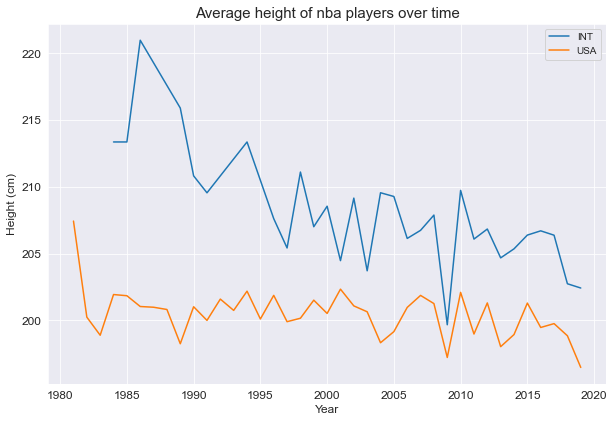

In [24]:
# plot trend of international and american nba player height over years
plt.figure(figsize=(10,8))
plt.plot(big_men_drafting['draft_year'], big_men_drafting['player_height'], label = 'INT')
plt.plot(USA_player_drafting['draft_year'], USA_player_drafting['player_height'], label = 'USA')
plt.legend(loc = 'upper right')
plt.title('Average height of nba players over time', fontsize = 15)
plt.axis('scaled')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Height (cm)', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 90.,  95., 100., 105., 110., 115., 120., 125., 130., 135.]),
 <a list of 10 Text major ticklabel objects>)

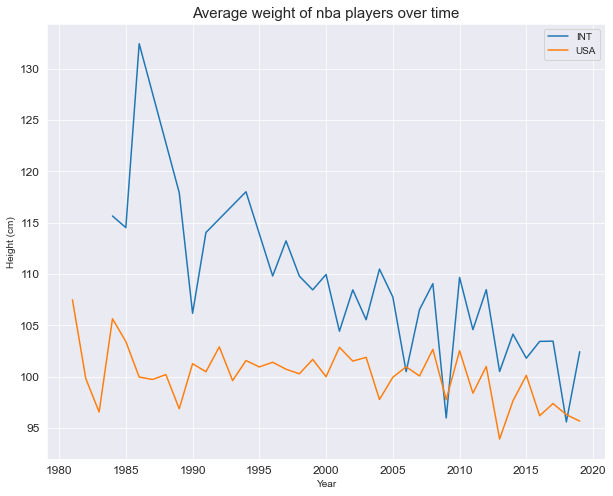

In [25]:
# plot trend of international and american nba player weight over years
plt.figure(figsize=(10,8))
plt.plot(big_men_drafting['draft_year'], big_men_drafting['player_weight'], label = 'INT')
plt.plot(USA_player_drafting['draft_year'], USA_player_drafting['player_weight'], label = 'USA')
plt.legend(loc = 'upper right')
plt.title('Average weight of nba players over time', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

Surprisingly, we can see that many of the hypothesis' may have been true or false at different points in time.

- Larger big men may have been sought after internationally more often in the 90's, since we see a big disparity between average height in that decade between USA born players and international players.

- We see a downward trend of height as time goes on, this may indicate that the NBA is moving towards a different play style of basketball. Instead of big men dominating the league, athleticism, game IQ, ball-handling, shooting and speed are more valued (known as 'small-ball').

# Have these changes affected playstyle in the NBA?

Let's add positions to the data set. 
There are 3 categories for positions in the NBA, usually dictated by height due to the different mobility of different heights.

- Bigs/Centers: They often play the center position, as they are the tallest. Their advantage in height means their main role is for rebounding, rim-protection and blocking.

- Forwards: These players are not as tall as centers, but are usually bigger and more physical than guards. They can score and are good defensive players. 

- Guards: These are the smaller players, and often see the ball in their hand for most of the time. Offence is run by them. Due to their size, they are the usually the fastest.

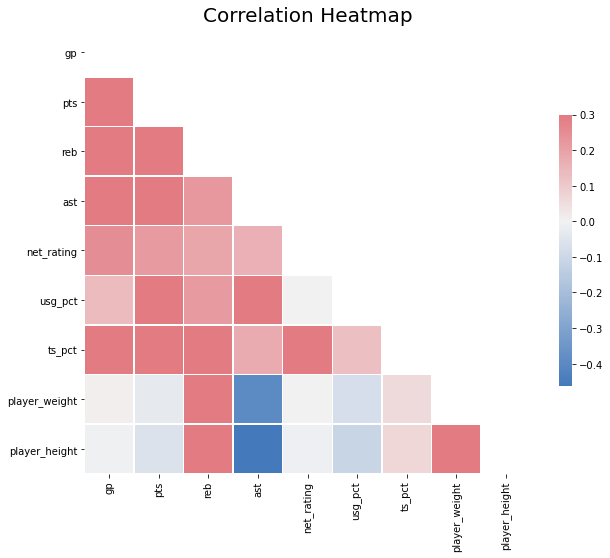

In [5]:
# check correlation chart
data_corr = data[["gp","pts","reb","ast","net_rating","usg_pct","ts_pct","player_weight","player_height"]]

corr = data_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap', fontsize = 20)

plt.show()

- From the correlation heatmap above, we can see that height and weight is higher correlated with rebounds. This suggests that centers and forwards have advantages when it comes to crashing the boards and getting rebounds.

- However, we se that both assists and usg_pct are negatively correlated. This makes sense because it is usually the guards who are mostly in possession of the ball during offensive plays.

- USG_PCT refers to the "percentage of team plays used by a player while he was on the floor" (www.basketball-reference.com)

# Has this changed over the years? 
Looking at how a certain position plays may give indication on if and how the NBA has changed in terms of playstyle.

In [43]:
query = """
        SELECT season, SUM(pts) AS 'pts', SUM(reb) AS 'reb', SUM(ast) AS 'ast'
        FROM data
        WHERE position = 'Center'
        GROUP BY season
        """
C_per_season = ps.sqldf(query, locals())
C_per_season.head()

,season,pts,reb,ast
0,1996,952.3,598.1,123.9
1,1997,953.9,604.2,129.9
2,1998,868.2,562.0,111.5
3,1999,876.1,560.0,117.8
4,2000,857.3,578.0,113.1


In [44]:
query = """
        SELECT season, SUM(pts) AS 'pts', SUM(reb) AS 'reb', SUM(ast) AS 'ast'
        FROM data
        WHERE position = 'Guard'
        GROUP BY season
        """

G_per_season = ps.sqldf(query, locals())

query = """
        SELECT season, SUM(pts) AS 'pts', SUM(reb) AS 'reb', SUM(ast) AS 'ast'
        FROM data
        WHERE position = 'Forward'
        GROUP BY season 
        """
F_per_season = ps.sqldf(query, locals())

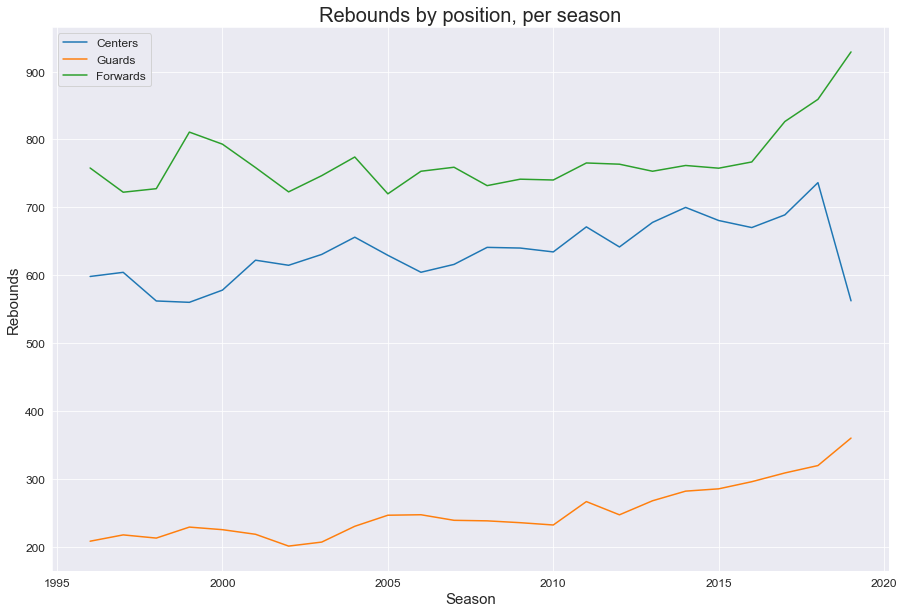

In [45]:
# Display position trends for points

plt.figure(figsize = (15,10))
plt.plot(C_per_season['season'], C_per_season['reb'], label = 'Centers')
plt.plot(G_per_season['season'], G_per_season['reb'], label = 'Guards')
plt.plot(F_per_season['season'], F_per_season['reb'], label = 'Forwards')
plt.legend(loc = 'best', fontsize = 12)
plt.title('Rebounds by position, per season', fontsize = 20)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Rebounds', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

From the data above, we can see a steep decline in total reobounds by centers (tallest players) in the recent years. 
At the same time, we see a significant increase in total rebounds by both forwards and guards in a similar time frame.

This may suggest that the smaller players are becoming more athletic to contest the rebounds against the larger players.

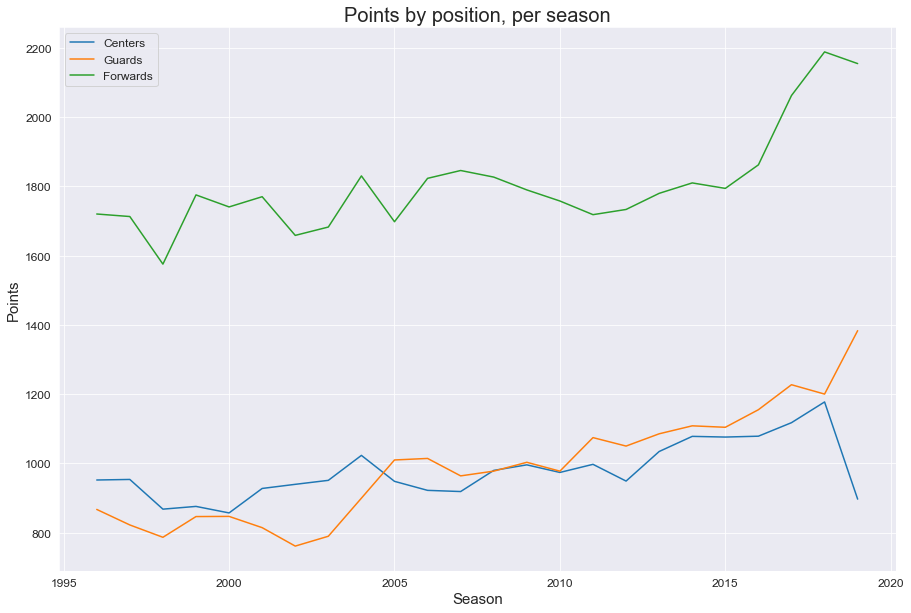

In [46]:
# Display position trends for points

plt.figure(figsize = (15,10))
plt.plot(C_per_season['season'], C_per_season['pts'], label = 'Centers')
plt.plot(G_per_season['season'], G_per_season['pts'], label = 'Guards')
plt.plot(F_per_season['season'], F_per_season['pts'], label = 'Forwards')
plt.legend(loc = 'best', fontsize = 12)
plt.title('Points by position, per season', fontsize = 20)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Points', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Looking at Points, we can see that during the 90's and early 2000's, offence revolved around getting the ball to the centers for them to dominate the paint and get easier points.

However, We see a change in trends from 2005 and onwards, where the points for guards begin rising, eclipsing the points for big men. This indicates that offense started to move towards being more guard focused, i.e. ranged shooting, isolation basketball etc. 

Commenting on the large differential between centers/guards and forwards, this may be a result of our subsetting. We subset by height, although this may not be a true indication of position. For example, Australian NBA star Ben Simmons is listed at a 208cm, yet plays a guard position.

In our early code, we established that a forward was between 195cm and 206cm. However, the most proliffic guards/scorers have been able to be as such, due to being bigger and size, yet have the skillet, speed and abilities of guards, thus being able to outplay and even physically 'bully' their smaller matchups. Example of this are Michael Jordan and Kobe Bryant, both of whom played guard positions, yet are listed at 198cm. So in this case, they are listed as forwards in our data.  

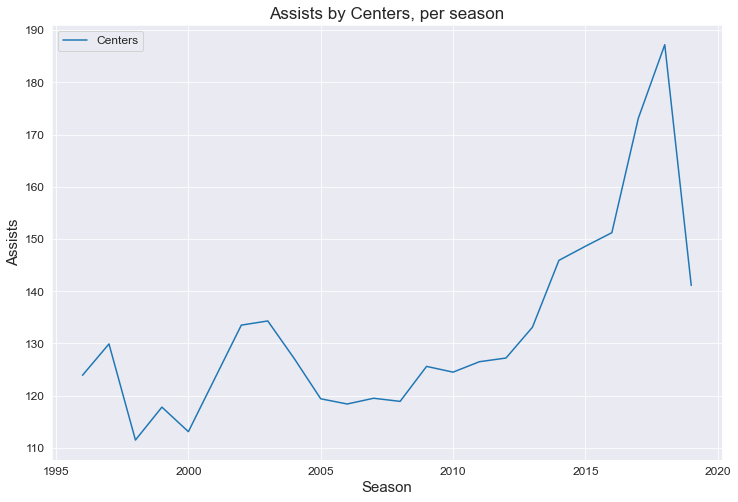

In [57]:
# Display assists trends per position

plt.figure(figsize = (12,8))
plt.plot(C_per_season['season'], C_per_season['ast'], label = 'Centers')
plt.legend(loc = 'best', fontsize = 12)
plt.title('Assists by Centers, per season', fontsize = 17)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Assists', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

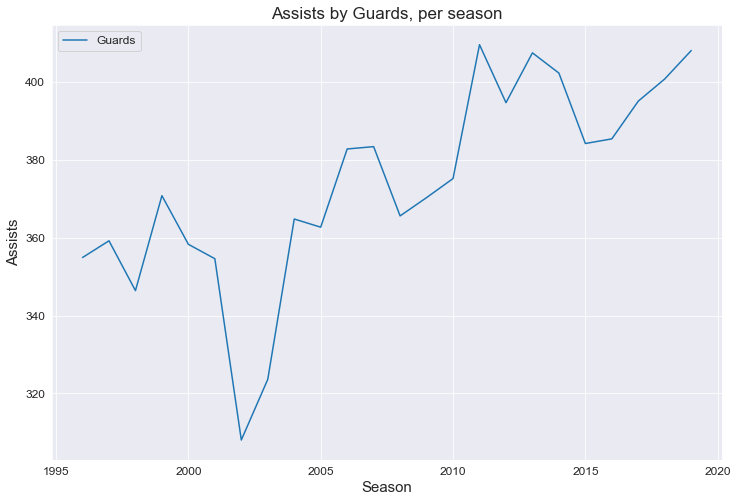

In [58]:
plt.figure(figsize = (12,8))
plt.plot(G_per_season['season'], G_per_season['ast'], label = 'Guards')
plt.legend(loc = 'best', fontsize = 12)
plt.title('Assists by Guards, per season', fontsize = 17)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Assists', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

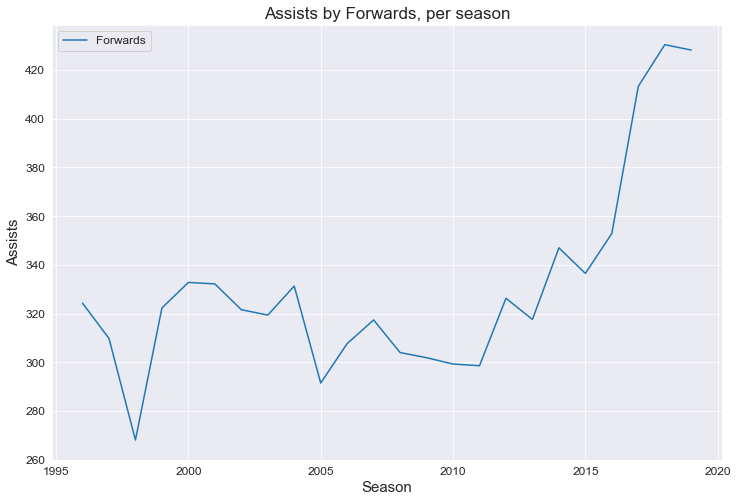

In [61]:
plt.figure(figsize = (12,8))
plt.plot(F_per_season['season'], F_per_season['ast'], label = 'Forwards')
plt.legend(loc = 'best', fontsize = 12)
plt.title('Assists by Forwards, per season', fontsize = 17)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Assists', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Observations

For centers, we see that they are passing more often. This further supports that NBA teams are looking to run plays and score off of guards and their shooting ability. This is especially evident after 2010 after Miami Heat Coach employed this style during the 2011-12 season, labelling it 'pace and space'. After its success, NBA teams evaluated the efficiency of this style to be super-effective and began employing similar tactics.

This effect is most noticable in the sharp increase after 2015, after the Golden State Warriors (led be point guard Steph Curry, arguably the best shooter of all time), employed this to an even greater extent, relying on shooting and spacing the floor (rendering big men ineffective).

The large dip in the last few years may be due to the increasing amount of high scoring players who play guard and forward positions being taller and more athletic (e.g. Kevin Durant (208cm), Ben Simmons (208cm), Giannis Antetokounmpo (211cm)) but are classified in our data as centers. 

Overall, we see that assists have sharply gone up 2015 onwards, even by guards. This further emphasises shifting away from isolation play-style, and towards small-ball playstyle, involing drawing in players and passing it to the open man for an open shot (from 3pt range).

Assists growing from forwards also suggests that not only are the passing to guards, but to center-classified players. This indicates that taller players are adjusting to playstyle, and learning how to shoot the ball from range.